<a href="https://colab.research.google.com/github/hayhrmwn/data-science/blob/main/loan_data_2007_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

problem: Permasalahan yang dihadapi oleh perusahaan pemberi pinjaman multifinance adalah kebutuhan untuk meningkatkan keakuratan dalam menilai dan mengelola risiko kredit. Hal ini bertujuan untuk mengoptimalkan keputusan bisnis mereka dan mengurangi potensi kerugian. Dalam konteks ini, kami ditugaskan untuk mengembangkan model machine learning yang dapat memprediksi risiko kredit (credit risk) berdasarkan dataset yang disediakan, yang mencakup data pinjaman yang disetujui dan ditolak.

Buisness Metrics: Loss, net profit margin.

solution explanation: Data pinjaman dari Lending Club antara tahun 2007 hingga 2014 akan dianalisis untuk mengidentifikasi pola atau tanda-tanda bahwa suatu pinjaman berpotensi menjadi buruk atau berisiko. Analisis data ini akan menjadi dasar untuk pengambilan keputusan investasi. Metode analisis yang digunakan tidak memerlukan asumsi yang kuat, karena latar belakang statistik yang mendalam tidak tersedia. Dengan memahami pola dalam data, diharapkan investasi dalam pinjaman berisiko dapat dikurangi, sehingga mengurangi kerugian dan meningkatkan margin keuntungan bersih.

Data: Lending Club 2007 - 2014









In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filepath = '/content/kaggle/input/loan_data_2007_2014/loan_data_2007_2014.csv'

In [ ]:
df = pd.read_csv(filepath, low_memory=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

bisa kita lihat disini, banyak null dan data yang missing, tertuama di bagian akhir colum. dan kolom "Unnamed: 0" yang bermasalah karena merupakan salinan dari indeks.

In [ ]:
missing_values = df.isnull().mean()
missing_values[missing_values==1].index

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [ ]:
drop_col = ['Unnamed: 0', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m']

data = df.drop(columns=drop_col, axis=1)

In [ ]:
data.loan_status.value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

Disini kita ingin memprediksi apakah suatu pinjaman berisiko atau tidak, jadi, kita perlu mengetahui akhir dari setiap pinjaman secara historis, apakah itu gagal bayar (defaulted/charged off) atau telah dilunasi sepenuhnya (fully paid). Seperti yang dapat kita lihat, ada nilai-nilai seperti "Current" dan "In Grace Period" yang ambigu. Akhir dari pinjaman-pinjaman tersebut bisa saja gagal bayar atau dilunasi sepenuhnya, jadi kita tidak bisa menggunakan status tersebut. Status "Late" juga agak ambigu,  karena disini secara pribadi tidak berminat berinvestasi dalam pinjaman yang terlamat, jadi disini kita akan mengklasifikasikan mereka sebagai 'bad loan'.

kita akan mengklasifikasikan akhir dari pinjaman sebagai berikut:

Pinjaman tidak berisiko / pinjaman baik = ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]
Pinjaman berisiko / pinjaman buruk = ["Charged Off", "Late (31-120 days)", "Late (16-30 days)", "Default", "Does not meet the credit policy. Status:Charged Off"]

In [ ]:
ambigous = ['Current', 'In Grace Period']
good_loan = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

data = data[data.loan_status.isin(ambigous) == False]

data['loan_ending'] = np.where(data['loan_status'].isin(good_loan), 'good', 'risky')

<ipython-input-9-37654b1c2938>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_ending'] = np.where(data['loan_status'].isin(good_loan), 'good', 'risky')


<Axes: title={'center': 'good vs risky loans balance'}, xlabel='loan_ending'>

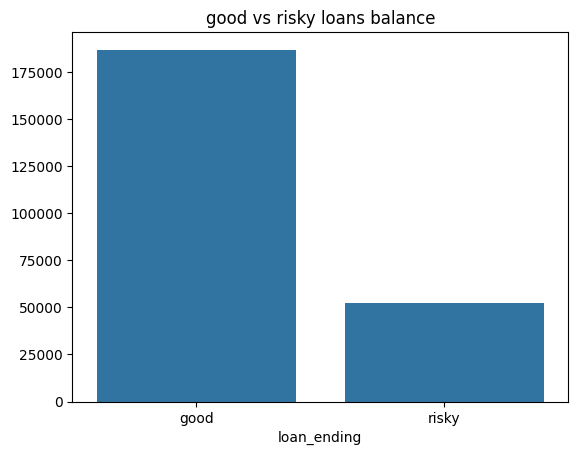

In [ ]:
plt.title('good vs risky loans balance')
sns.barplot(x=data.loan_ending.value_counts().index,y=data.loan_ending.value_counts().values)

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim

Berikut beberapa kolom dari data.columns:

*   'id': ID pinjaman  
*   'member_id': ID peminjam yang diberikan oleh LendingClub. Satu anggota dapat terkait dengan lebih dari satu ID pinjaman.
*   'loan_amnt': Jumlah pinjaman. Kolom ini sangat berkaitan dengan 'funded_amnt' dan 'funded_amnt_inv'.
*   'term': Jangka waktu pinjaman
*   'int_rate': Suku bunga
*   'installment': Dalam bahasa Indonesia ini adalah 'cicilan'. Seharusnya berkaitan dengan 'loan_amnt' dan 'int_rate'. cicilan = loan_amnt * int_rate (secara kasar).
*   'grade': Peringkat pinjaman, diberikan oleh LC
... dll

1. Kolom yang terkait dengan karakteristik dasar pinjaman:
'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'application_type'

2. Kolom yang terkait dengan identitas dasar peminjam:
'member_id', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'zip_code', 'addr_state', 'dti'

3. Kolom yang terkait dengan catatan pribadi peminjam:
'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'mths_since_last_major_derog', 'acc_now_delinq'

4. Kolom yang terkait dengan status saat ini dari pinjaman (setelah diterbitkan):
'issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'

Pemahaman data dan kolomg sangat penting disini. DIsini kita akan mempredisiki apakah pinjaman berisiko atau tidak, sebelum kita melakukan investasi dalam pinjaman tersebut. bukan setelahnya. Masalah dengan data yang sudah kita lihat terletak pada kolom-kolom yang terkait dengan status pinjaman saat ini yang sudah di jelaskan pada poin (4).  Disini kita hanya bisa mendapatkan data dari kolom-kolom tersebut setelah pinjaman diterbitkan, dengan kata lain, setelah kita melakukan investasi dalam pinjaman tersebut.

sebagai contoh, 'out_prncp' (saldo pokok yang belum dibayar), ketika out_prncp adalah 0, itu berarti pinjaman sudah lunas, mudah untuk diprediksi berdasarkan variabel ini saja, dan itu akan sangat akurat. Contoh lain adalah dengan 'recoveries', pemulihan hanya terjadi setelah seorang peminjam tidak dapat membayar pinjaman dan lembaga pemberi pinjaman memulai proses pemulihan pinjaman. Tentu saja, kita tahu bahwa pinjaman itu buruk dan beresik, hanya dari informasi saja.

Dalam data science. jenis variabel ini disebut Data Leakage. Data yang dimana tidak akan kita dapatkan ketika kita menggunakan model tersebut dalam implementasi. Kita tidak akan tahu apakah ada biaya pemulihan, atau apakah saldo pokok yang belum di bayar akan menjadi 0 atau tidak sebelum pinjaman selesai. Jika kita membangun model kita menggunakan data dengan Data Leakage.

Jadi disini kita akan menghapus kolom-kolom tersebut yang mengandung Data Leakage dan kita hanya akan menyimpan kolom dengan data yang dapat diperoleh sebelum pinjaman di investasikan.

In [ ]:
leakage_col = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

data.drop(columns=leakage_col, axis=1, inplace=True)

In [ ]:
data[['loan_amnt','funded_amnt','funded_amnt_inv','grade','sub_grade','desc','purpose','title']]

,loan_amnt,funded_amnt,funded_amnt_inv,grade,sub_grade,desc,purpose,title
0,5000,5000,4975.0,B,B2,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer
1,2500,2500,2500.0,C,C4,Borrower added on 12/22/11 > I plan to use t...,car,bike
2,2400,2400,2400.0,C,C5,NaN,small_business,real estate business
3,10000,10000,10000.0,C,C1,Borrower added on 12/21/11 > to pay for prop...,other,personel
5,5000,5000,5000.0,A,A4,NaN,wedding,My wedding loan I promise to pay back
...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,D,D3,NaN,medical,Medical expenses
466277,18000,18000,17975.0,A,A4,Borrower added on 12/09/13 > consolidate all...,debt_consolidation,my loan
466278,10000,10000,10000.0,D,D3,NaN,vacation,Vacation
466281,22000,22000,22000.0,D,D5,NaN,debt_consolidation,Debt consolidation


Mari kita hapus kolom-kolom  lebih lanjut.  Seperti yang dapat kita lihat, 'loan_amnt', 'funded_amnt', dan 'funded_amnt_inv' terlihat mirip, jadi kami dapat menghapus 2 dari ini. 'grade' dan 'sub_grade' juga mirip, tetapi untuk memilih yang akan dihapus, kita akan melihat nilai unik terlebih dahulu karena kedua kolom ini adalah kolom kategorikal.

Kolom lain yang akan dihapus adalah 'id', 'member_id', 'url', dan 'desc'. Dan disini bisa kita asumsikan bahwa kolom 'desc' bersifat opsional dan banyak orang yang tidak mengisinya karena 'title' dan 'purpose' sudah cukup untuk menjelaskan pinjaman.

In [ ]:
data[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,238913.000000,238913.000000,238913.000000
mean,13486.214647,13440.797173,13312.662461
std,8066.725464,8042.190169,8080.099456
min,500.000000,500.000000,0.000000
25%,7200.000000,7200.000000,7125.000000
50%,12000.000000,12000.000000,11914.311470
75%,18000.000000,18000.000000,18000.000000
max,35000.000000,35000.000000,35000.000000


In [ ]:
drop_col = ['funded_amnt', 'funded_amnt_inv', 'id', 'member_id', 'url', 'desc']
dropped_data = data[drop_col]

data.drop(columns=drop_col, axis=1, inplace=True)

**EDA **

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238913 entries, 0 to 466283
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    238913 non-null  int64  
 1   term                         238913 non-null  object 
 2   int_rate                     238913 non-null  float64
 3   installment                  238913 non-null  float64
 4   grade                        238913 non-null  object 
 5   sub_grade                    238913 non-null  object 
 6   emp_title                    225435 non-null  object 
 7   emp_length                   229688 non-null  object 
 8   home_ownership               238913 non-null  object 
 9   annual_inc                   238909 non-null  float64
 10  verification_status          238913 non-null  object 
 11  purpose                      238913 non-null  object 
 12  title                        238897 non-null  object 
 13  zip_

1. Personal records data

satu hal yang menarik berdasarkan informasi data di atas yaitu data yang terkait dengan personal records data, memiliki begitu banyak nilai null. Secara khusu, bulan sejak terlambat pembayaran terakhir, bulan sejak catatan publik terakhir, dan bulan sejak penyimpangan besar terakhir. Mari kita coba untuk memeriksa data tersebut.

In [ ]:
personal_record = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']

data[personal_record]

,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,35.0,NaN,NaN
5,NaN,NaN,NaN
...,...,...,...
466276,3.0,NaN,4.0
466277,14.0,NaN,14.0
466278,29.0,NaN,32.0
466281,NaN,116.0,NaN


seperti yang kita lihat dari data,  ini sedikit rumit untuk melakukan modifikasi jenis data seperti ini. Nilai NaN harusnya menjadi tak hingga, karena mereka adalah orang yang tidak pernah melakukan hal buruk. Ini juga agak kontra-intrutif, karena '0' berarti peminjam baru saja melakukan hal buruk bulan ini (berisiko), dan semakin besar nilainya, semakin baik. Jika kita ingin mengukur seberapa berisiko itu, kita bisa menggunakan data ini sebagai penyebut untuk beberapa angka, jadi, bulan yang lebih rendah -> hasil yang lebih besar (lebih berisiko). Masalahnya adalah, kita tidak tahu apa yang harus dipilih sebagai pembilang.

Berikut beberapa ide: gunakan 1 sebagai pembilang, dan (bulan+1) sebagai penyebut, hitung semua data, kemudian gantikan NaN dengan 0, sehingga nilainya akan dari 0 (tidak pernah melakukan hal buruk) hingga 1 (baru-baru ini melakukan hal buruk).

Untungnya, 'mths_since_last_delinq' terkait dengan 'delinq_2yrs' dan 'acc_now_delinq', dan 'mths_since_last_record' terkait dengan 'pub_rec', jadi kita bisa langsung menghapus dua kolom tersebut. Untuk 'mths_since_last_major_derog', kita akan mengubahnya menjadi 'pernah melakukan perbuatan buruk besar? ya (1) atau tidak (0)', untuk saat ini.

In [ ]:
data['major_derogatory'] = np.where(data['mths_since_last_major_derog'].isna(), 0, 1)

drop_col = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
dropped_data = pd.concat([dropped_data, data[drop_col]], axis = 1)

data.drop(columns=drop_col, axis=1, inplace=True)

2. Kinda vague Variables

Kolom-kolom menarik lainnya adalah tot_coll_amt, tot_cur_bal, total_rev_hi_lim. Mereka adalah tiga kolom terakhir, dan memiliki jumlah nilai non-null yang sama. Disini kita bisa berasumsi bahwa ini adalah fitur-fitur baru dalam rentang waktu antara 2007-2014, sehingga banyak nilai masih null, terutama yang lebih lama. Deskripsi dari kolom-kolom ini juga agak samar, sehingga kita tidak perlu ragu apakah data mengandung kebocoran atau tidak. Kita akan mencoba menjelajahi kolom-kolom ini lebih lanjut terlebih dahulu, sehingga kita dapat memutuskan apa yang harus dilakukan.








In [ ]:
cols = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# pivot table aggregated by mean
print(pd.pivot_table(data, index = 'loan_ending', values = cols))

# pivot table aggregated by max value
print(pd.pivot_table(data, index = 'loan_ending', values = cols, aggfunc = np.max))

             tot_coll_amt    tot_cur_bal  total_rev_hi_lim
loan_ending                                               
good           219.721618  143006.253262      29996.098672
risky          141.355723  116108.175291      26256.733754
             tot_coll_amt  tot_cur_bal  total_rev_hi_lim
loan_ending                                             
good            9152545.0    8000078.0         2013133.0
risky             95806.0    3437283.0         1998700.0


In [ ]:
data[cols].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.722900e+05,1.722900e+05,1.722900e+05
mean,2.009637e+02,1.365678e+05,2.910103e+04
std,2.211009e+04,1.501802e+05,2.854495e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.795400e+04,1.320000e+04
50%,0.000000e+00,7.923900e+04,2.200000e+04
75%,0.000000e+00,2.064025e+05,3.620000e+04
max,9.152545e+06,8.000078e+06,2.013133e+06


<Axes: xlabel='tot_coll_amt', ylabel='Density'>

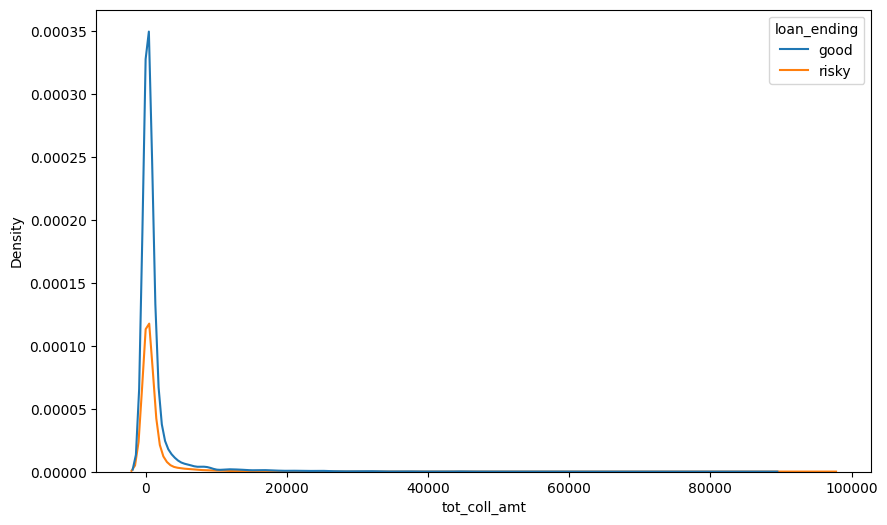

In [ ]:
plt.figure(figsize=(10,6))

# I use "> 0" because 75% of the data is 0... so the plot below just use < 25% of the data
sns.kdeplot(data = data[(data['tot_coll_amt'] < 100000) & (data['tot_coll_amt'] > 0)], x='tot_coll_amt', hue='loan_ending')

<Axes: xlabel='tot_cur_bal', ylabel='Density'>

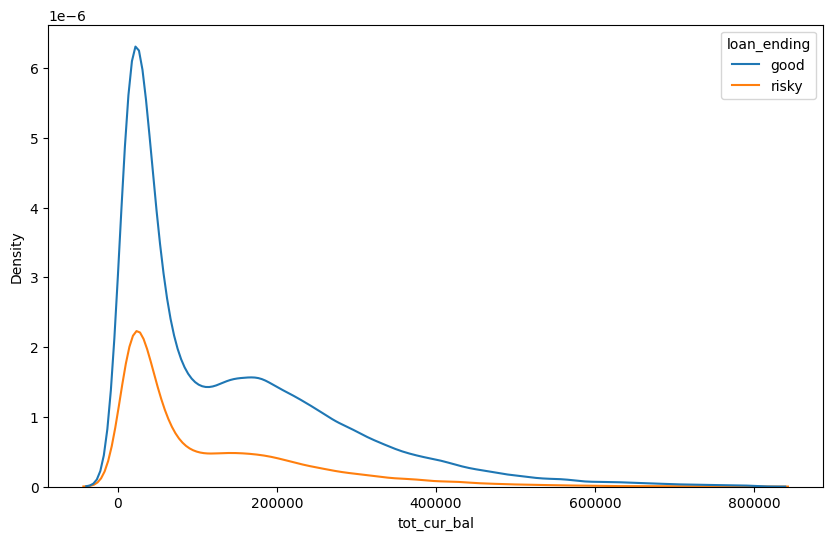

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data[data['tot_cur_bal'] < 800000], x='tot_cur_bal', hue='loan_ending')

<Axes: xlabel='total_rev_hi_lim', ylabel='Density'>

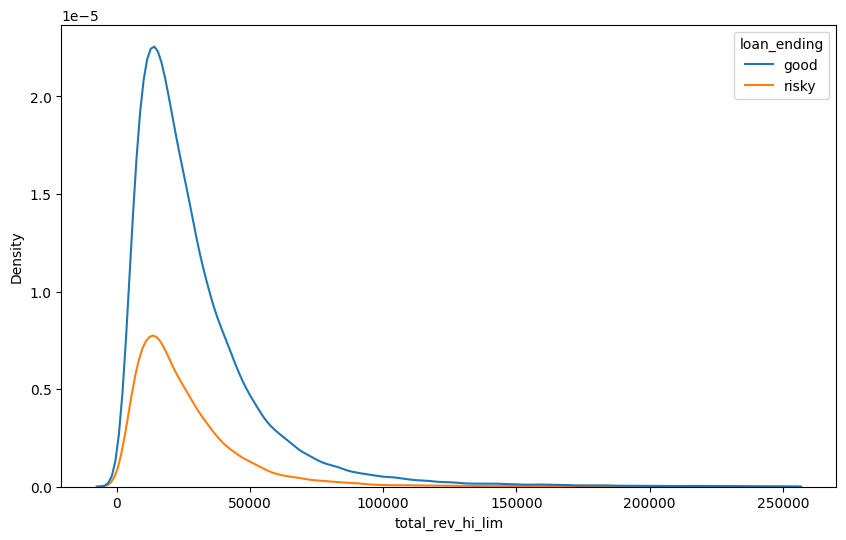

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data[data['total_rev_hi_lim'] < 250000], x='total_rev_hi_lim', hue='loan_ending')

berikut dari temuan dari grafik di atas:

Deskripsi kolom-kolom ini agak kabur
75% dari tot_coll_amt adalah 0
Berdasarkan plot distribusi, tidak ada pemisah yang jelas antara pinjaman yang baik dan berisiko untuk setiap nilai kolom
Kita harus mengorbankan hampir ~50 ribu baris data jika kita ingin menggunakannya
Untuk keputusan akhir, disini kita memutuskan untuk tidak menggunakan kolom-kolom tersebut untuk sementara waktu.

In [ ]:
drop_col = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

dropped_data = pd.concat([dropped_data, data[drop_col]], axis = 1)
data.drop(drop_col, inplace=True, axis = 1)

**3. Data dengan nilai unique kecil**

In [ ]:
data.nunique()[data.nunique() < 10].sort_values()

policy_code                   1
application_type              1
term                          2
initial_list_status           2
loan_ending                   2
major_derogatory              2
verification_status           3
home_ownership                6
acc_now_delinq                6
grade                         7
collections_12_mths_ex_med    7
dtype: int64

In [ ]:
data.drop(['policy_code','application_type'], inplace=True, axis = 1)

Untuk data dengan nilai unik yang kecil, kita dapat menjelajahinya secara visual menggunakan rasio pinjaman bermasalah untuk setiap kategori.

In [ ]:
def risk_pct_chart(x):
    ratio = (data.groupby(x)['loan_ending'] # group by
         .value_counts(normalize=True) # calculate the ratio
         .mul(100) # multiply by 100 to be percent
         .rename('risky_pct') # rename column as percent
         .reset_index())

    sns.lineplot(data=ratio[ratio['loan_ending'] == 'risky'], x=x, y='risky_pct')
    plt.title(x)
    plt.show()

In [ ]:
print(data.nunique()[data.nunique() < 10].sort_values().index)

Index(['term', 'initial_list_status', 'loan_ending', 'major_derogatory',
       'verification_status', 'home_ownership', 'acc_now_delinq', 'grade',
       'collections_12_mths_ex_med'],
      dtype='object')


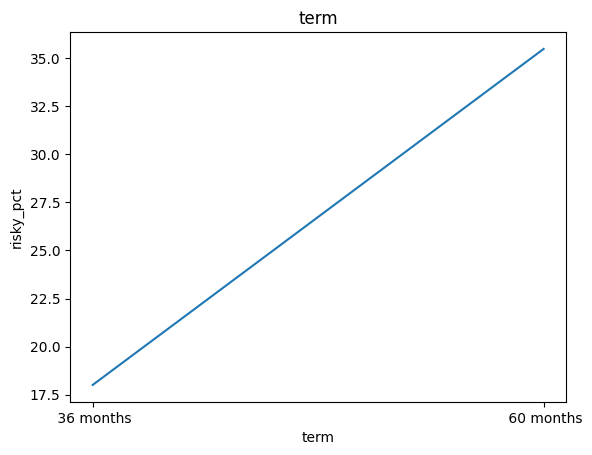

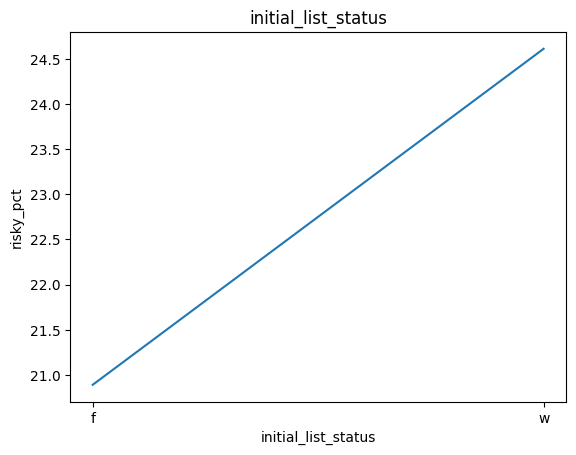

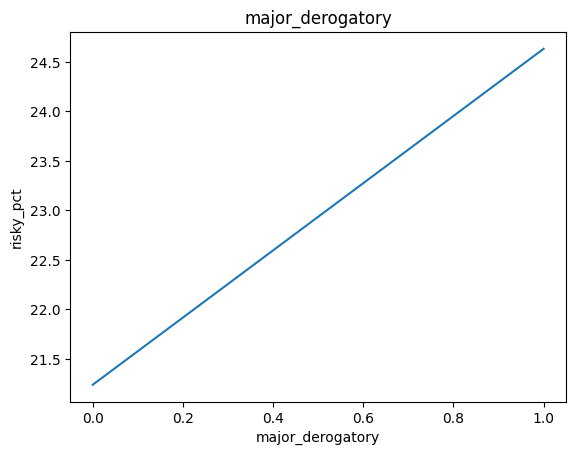

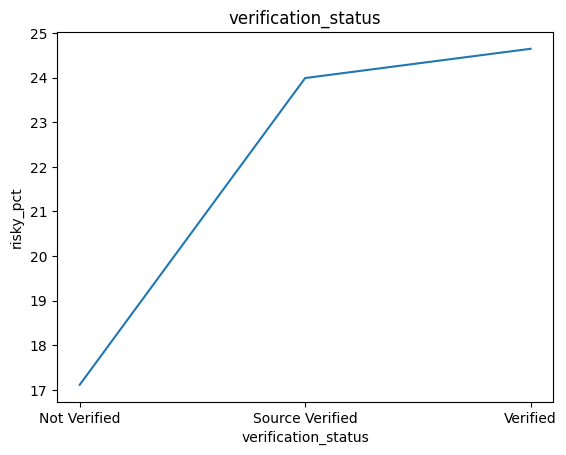

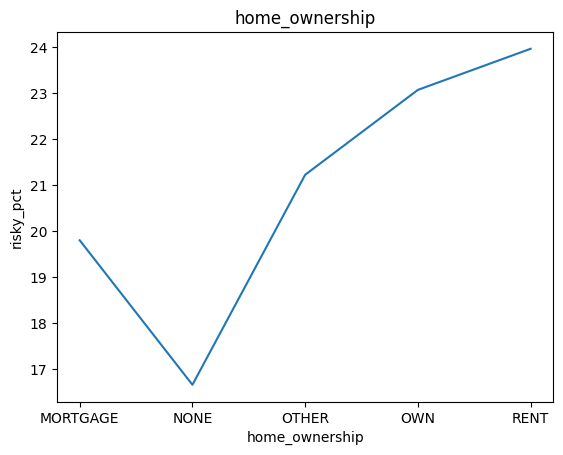

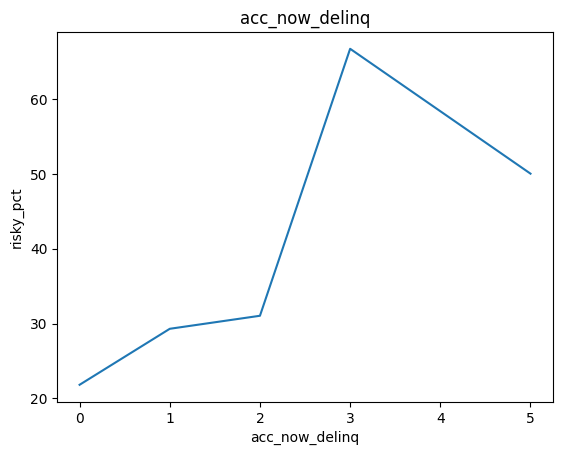

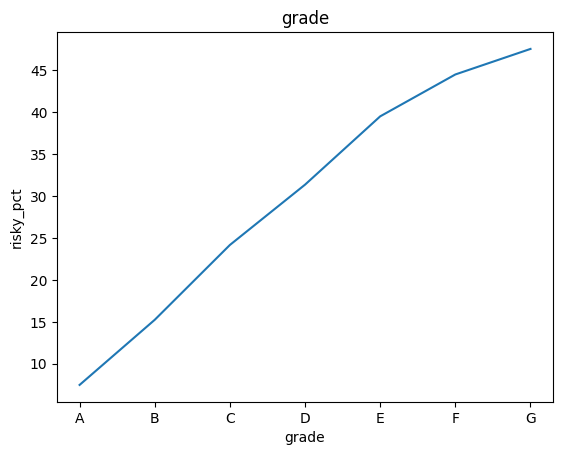

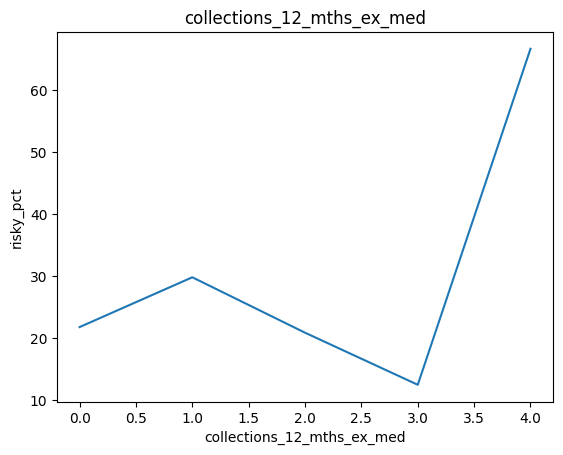

In [ ]:
small_unique = ['term', 'initial_list_status', 'major_derogatory',
       'verification_status', 'home_ownership', 'acc_now_delinq', 'grade',
       'collections_12_mths_ex_med']

for cols in small_unique:
    risk_pct_chart(cols)

**Kolom-kolom dengan perubahan signifikan dari rasio baik x risiko antara nilainya:**

* Grade
* Term
* acc_now_delinq

**Kolom-kolom dengan perubahan minor dari rasio antara nilainya:**

* home ownership
* verification status
* major derogatory
* intial_list_status


Namun, semuanya masih memiliki nilai yang baik, dan kita ingin tetap menyimpannya, karena setidaknya memberikan kontribusi, baik itu secara minor maupun major.

4. Numerical vs Categorical

Cleaning **bold text**

In [ ]:
num_data = data.select_dtypes(exclude= 'object')
num_data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'major_derogatory'],
      dtype='object')

In [ ]:
cat_data = data.select_dtypes(include= 'object')
cat_data.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_credit_pull_d', 'loan_ending'],
      dtype='object')

Berdasarkan kolom-kolom di atas, kita bisa melihat bahwa dalam kolom-kolom kategorikal, beberapa data sepertinya tidak sesuai. 'emp_length' (lama bekerja) seharusnya berupa numerik, dan 'earliest_cr_line' (tanggal pembukaan kredit terawal), 'last_credit_pull_d' (tanggal pengecekan kredit terakhir) seharusnya berupa datetime.

In [ ]:
cols = ['emp_length', 'earliest_cr_line', 'last_credit_pull_d']

cat_data[cols].head()

,emp_length,earliest_cr_line,last_credit_pull_d
0,10+ years,Jan-85,Jan-16
1,< 1 year,Apr-99,Sep-13
2,10+ years,Nov-01,Jan-16
3,10+ years,Feb-96,Jan-15
5,3 years,Nov-04,Sep-15


Data yang dapat kita asumsikan:

* Semakin lama masa kerja mengindikasikan pekerjaan yang lebih stabil, dan mengurangi risiko pinjaman.
* Semakin awal pembukaan kredit menunjukkan catatan kredit yang lebih baik.
* Tanggal penarikan kredit terakhir -> pertanyaan keras terakhir, jadi semakin lama jangka waktu antara pertanyaan (dan 'hari ini'), semakin baik. Lebih dari 2 tahun lebih baik.

In [ ]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [ ]:
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

data['emp_length'] = data['emp_length'].map(emp_map).fillna('0').astype(int)
data['emp_length'].unique()

array([10,  0,  3,  9,  4,  5,  1,  6,  2,  7,  8])

In [ ]:
data['earliest_cr_yr'] = pd.to_datetime(data['earliest_cr_line'], format = "%b-%y").dt.year

# calculate year since last inquiry
data['yr_since_last_inq'] = 2016 - pd.to_datetime(data['last_credit_pull_d'], format = "%b-%y").dt.year

data[['emp_length', 'earliest_cr_yr', 'yr_since_last_inq']].describe()

,emp_length,earliest_cr_yr,yr_since_last_inq
count,238913.000000,238884.000000,238890.000000
mean,5.566637,1997.710554,0.959149
std,3.716528,7.486129,1.162644
min,0.000000,1969.000000,0.000000
25%,2.000000,1994.000000,0.000000
50%,5.000000,1999.000000,1.000000
75%,10.000000,2002.000000,1.000000
max,10.000000,2068.000000,9.000000


Seperti yang terlihat, dari tahun kredit terawal, beberapa data melebihi waktu saat ini, dengan maksimal pada tahun 2068

Ini terjadi karena pd.to_datetime menggunakan 'unix' (epoch) sebagai asal atau tahun 1970, sehingga tidak ada tanggal sebelum 1970, dan tanggal sebelum 1970, misalnya 1969, 1968, diubah menjadi 2068, 2067, dll.

Karena saya masih pemula python & pandas baru-baru ini, saya masih belum tahu bagaimana menyesuaikan parameter tersebut, jadi saya akan menghapus data tersebut. Tapi jika Anda tahu caranya, saya pikir lebih baik tidak mengorbankan jenis data ini, karena semakin awal garis kredit, semakin stabil catatan kredit peminjam, karena mereka masih bisa meminjam sampai sekarang.








In [ ]:
data = data[data['earliest_cr_yr'] < 2016]

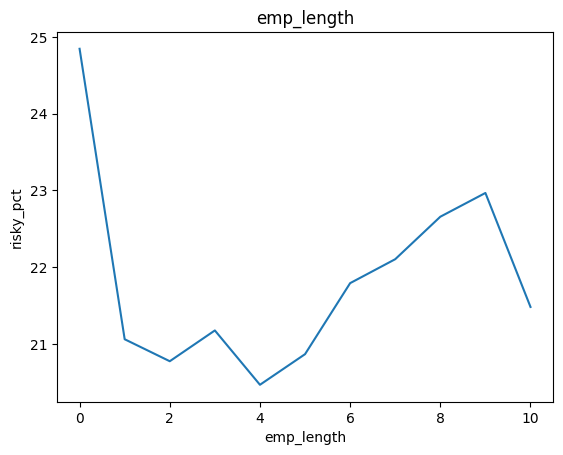

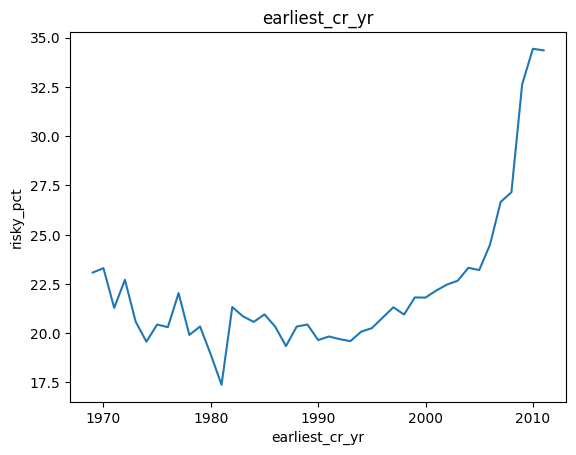

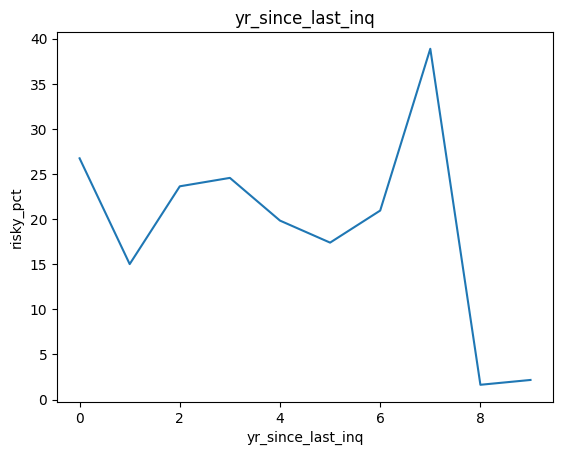

In [ ]:
to_chart = ['emp_length', 'earliest_cr_yr', 'yr_since_last_inq']

for cols in to_chart:
    risk_pct_chart(cols)

kesimpulan:



*   Lama kerja memiliki beberapa variasi, tetapi pekerjaan kurang dari 1 tahun memiliki persentase risiko terbesar.
*   Seperti yang kita pikirkan sebelumnya, semakin awal garis kredit, semakin stabil catatan peminjam, dan kita melihat tren naiknya risiko sehubungan dengan ini.
*   Sejalan dengan asumsi kita, 10 - 11 tahun sejak pemeriksaan terakhir memiliki rekening paling rendah risiko, dan 2 tahun atau kurang adalah yang kedua tertinggi. Saya tidak mengerti mengapa 9 tahun adalah yang tertinggi meskipun.














In [ ]:
to_drop = ['earliest_cr_line', 'last_credit_pull_d']
dropped_data = pd.concat([dropped_data, data[to_drop]], axis = 1)

# numerical
num_data = data.drop(to_drop, axis=1).select_dtypes(exclude= 'object')
print('num data: ', num_data.columns)

# categorical
cat_data = data.drop(to_drop, axis=1).select_dtypes(include= 'object')
print('cat data: ', cat_data.columns)

num data:  Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'major_derogatory', 'earliest_cr_yr',
       'yr_since_last_inq'],
      dtype='object')
cat data:  Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'initial_list_status', 'loan_ending'],
      dtype='object')


Data Numerik:
Histogram (distribusi)
Plot Korelasi
Pivot
Data Kategorikal:
Keseimbangan
Pivot

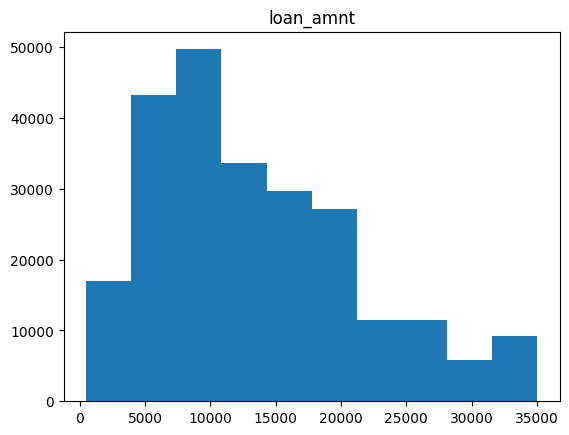

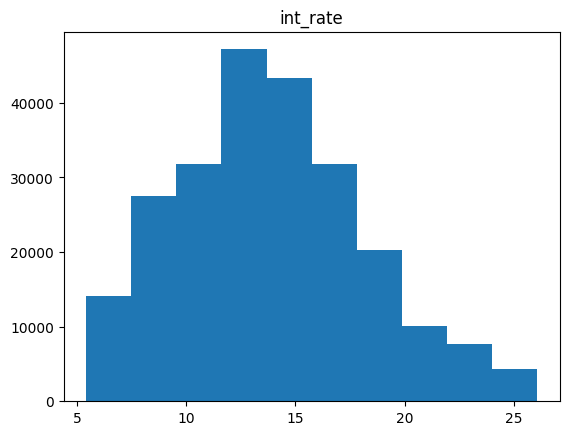

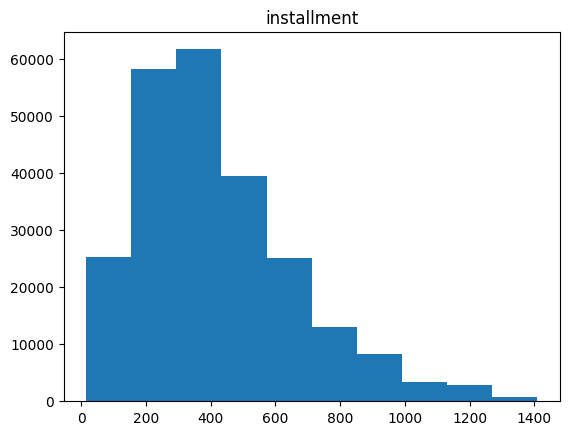

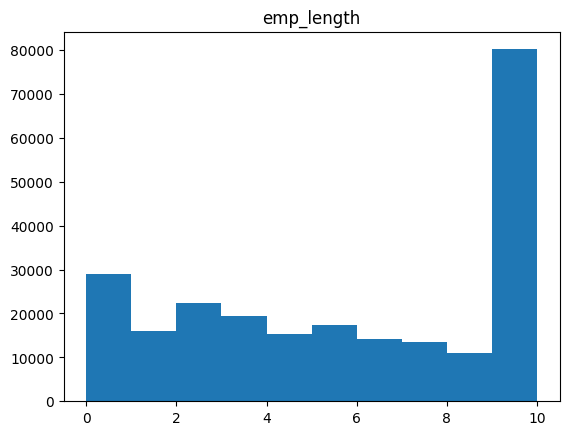

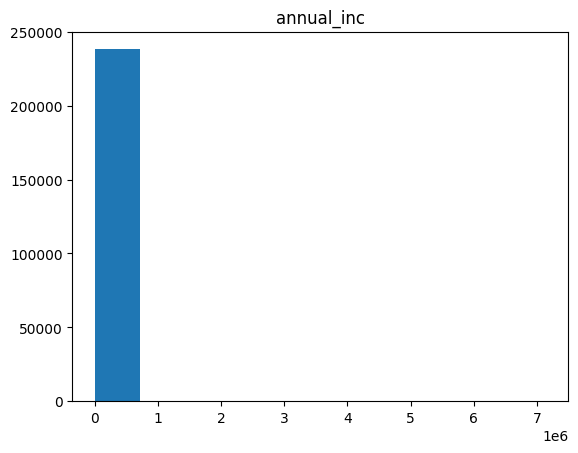

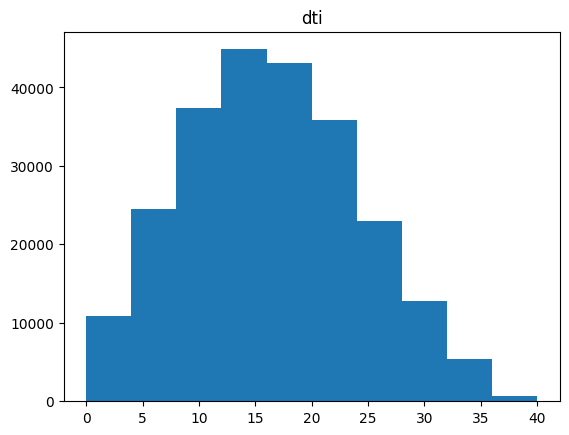

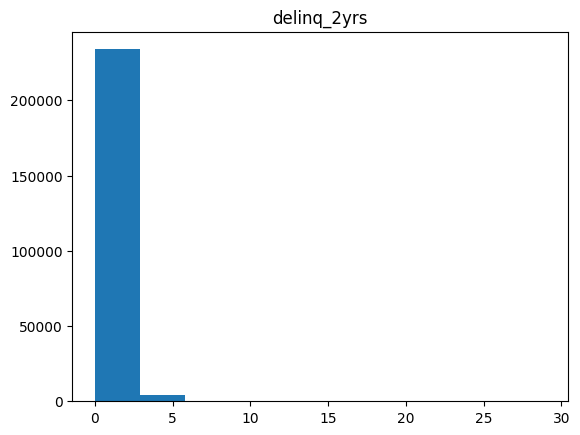

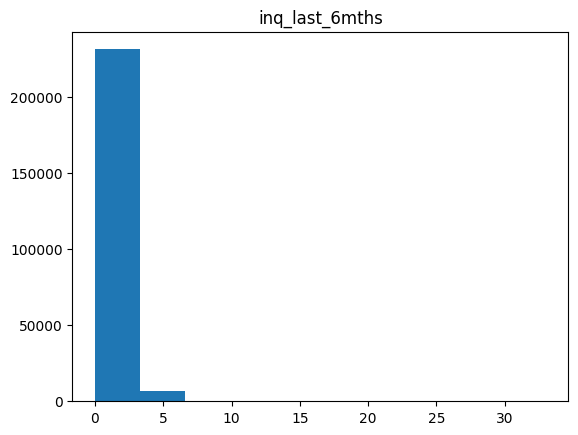

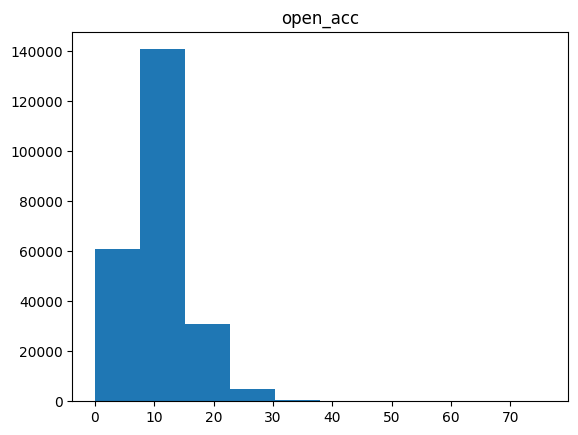

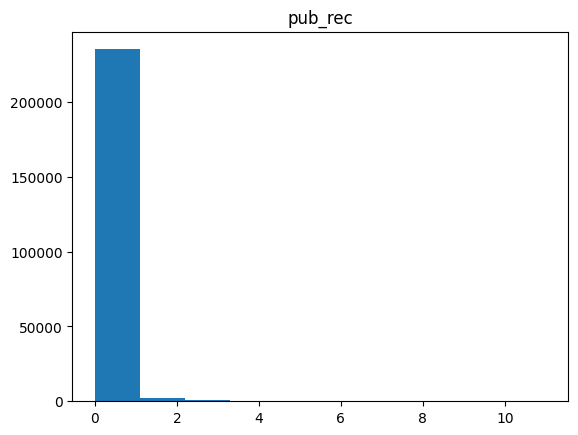

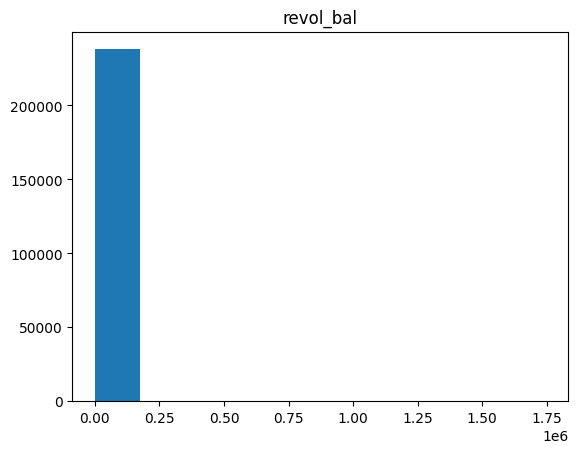

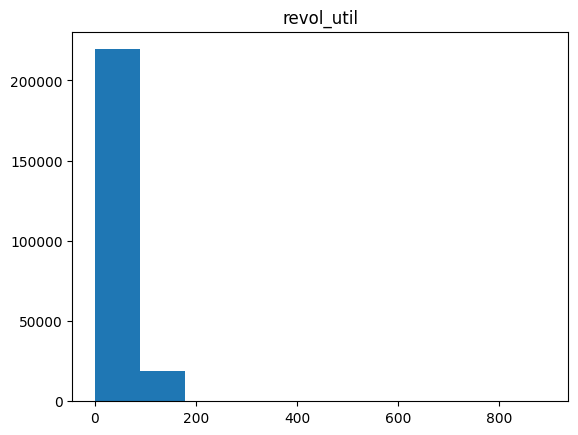

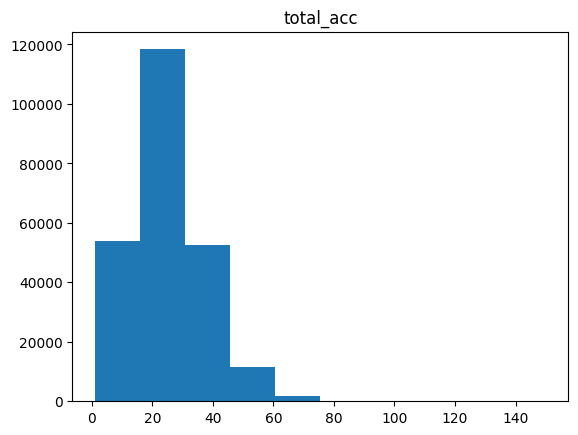

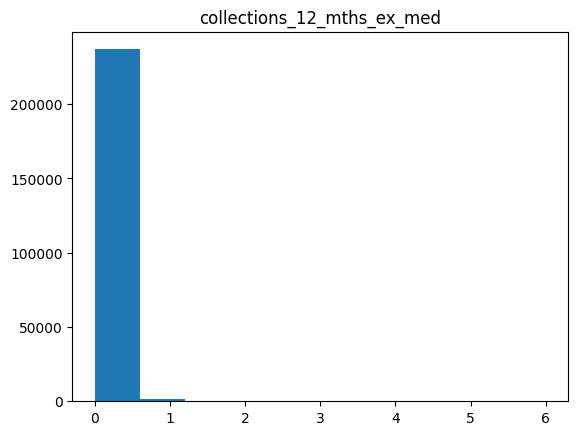

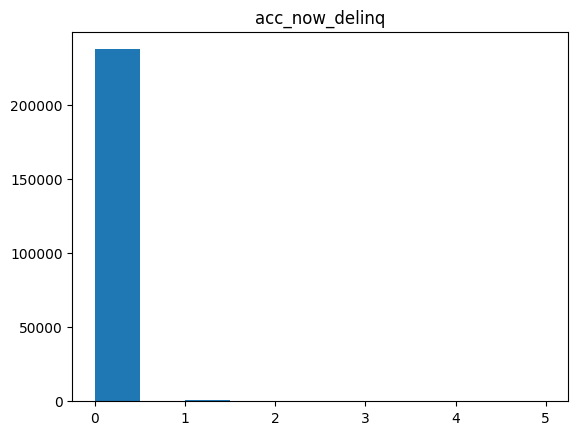

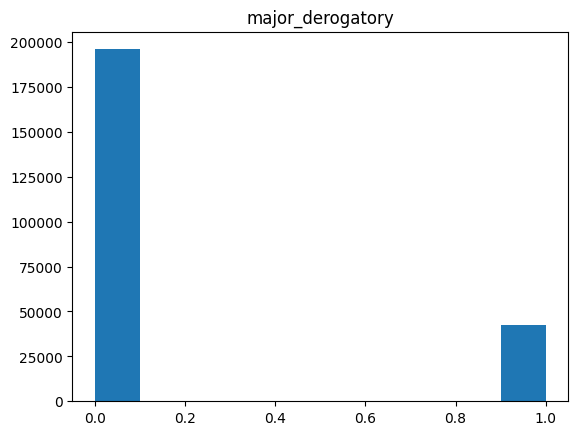

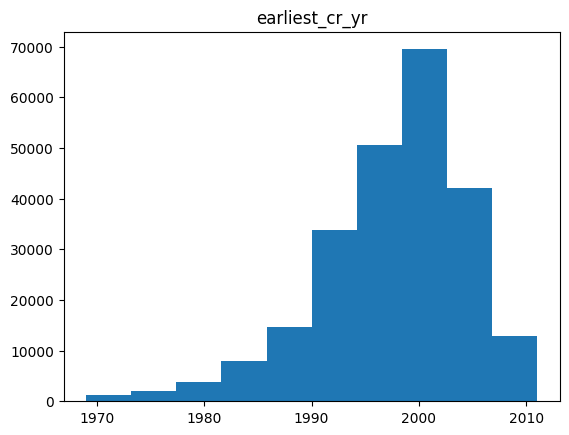

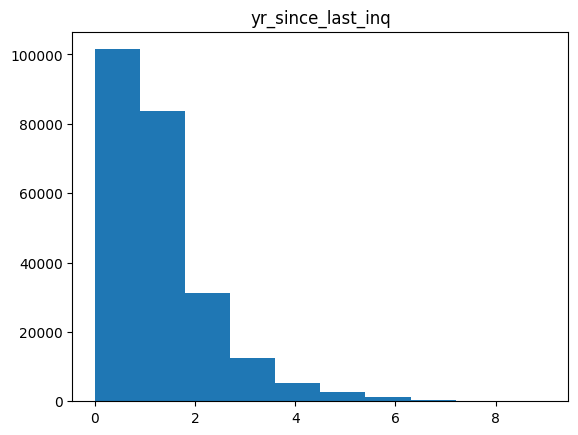

In [ ]:
# 1. distribution
for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

<Axes: >

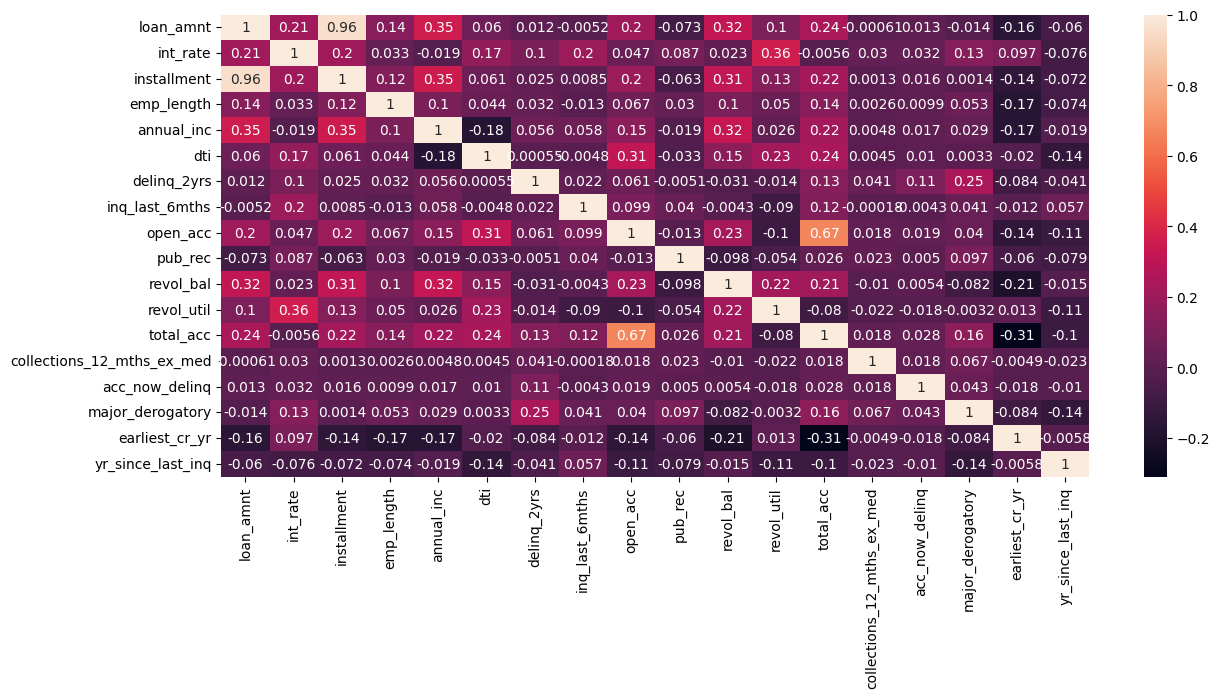

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(data=num_data.corr(), annot=True)

In [ ]:
pd.pivot_table(data, index = 'loan_ending', values = num_data.columns)

,acc_now_delinq,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_yr,emp_length,inq_last_6mths,installment,int_rate,loan_amnt,major_derogatory,open_acc,pub_rec,revol_bal,revol_util,total_acc,yr_since_last_inq
loan_ending,,,,,,,,,,,,,,,,,,
good,0.002587,73686.164671,0.005412,0.236165,15.920096,1997.434908,5.587686,0.872580,409.768577,13.265707,13167.634542,0.171615,10.786252,0.130941,15235.640579,53.724019,24.938820,0.981661
risky,0.003959,65627.606648,0.007845,0.290986,18.304076,1998.026562,5.509495,1.029425,442.595120,15.976388,14624.669902,0.200788,11.113569,0.148318,15126.616048,59.599248,24.328407,0.874962



Kesimpulan:


*   Hanya sejumlah kecil data numerik yang terdistribusi secara normal
*   Beberapa data mengandung pencilan
*   Beberapa data mengandung pencilan
Seperti yang diharapkan, cicilan & jumlah pinjaman berkorelasi, hampir sempurna. Ini karena cicilan = jumlah_pinjaman * tingkat_bunga. Sedangkan jumlah pinjaman bisa bervariasi, tingkat bunga biasanya tidak begitu bervariasi.

Berdasarkan tabel pivot, karakteristik pinjaman berisiko:

*   Berdasarkan catatan pribadi buruk:

      *   jumlah akun tunggakan yang lebih tinggi
      *   jumlah tunggakan dalam 2 tahun terakhir yang lebih tinggi
      *   jumlah permintaan dalam 6 bulan terakhir yang lebih tinggi  -> permintaan keras dapat memengaruhi penilaian kredit
      *   tahun sejak permintaan terakhir yang lebih rendah -> lebih rendah = baru-baru ini melakukan permintaan kredit



*   Berdasarkan kesulitan pembayaran yang lebih keras

      *   Pendapatan tahunan yang lebih rendah
      *   rasio utang terhadap pendapatan (dti) yang lebih tinggi -> dti = cicilan bulanan / pendapatan bulanan
      *   jumlah cicilan & jumlah pinjaman yang lebih tinggi
      *   tingkat bunga yang lebih tinggi (biasanya berkorelasi dengan grade pinjaman)

* revol_util yang lebih rendah (?)
* koleksi ex med yang lebih tinggi (?)




In [ ]:
cat_data.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              129725
home_ownership              6
verification_status         3
purpose                    14
title                   49818
zip_code                  875
addr_state                 50
initial_list_status         2
loan_ending                 2
dtype: int64

Kita tidak bisa menggunakan "zip_code", "title", dan "emp_title", karena mereka memiliki terlalu banyak nilai unik sebagai variabel kategorikal, dan sulit untuk dieksplorasi. "Title" adalah judul pinjaman yang ditetapkan oleh pengguna, dan "emp_title" adalah judul pekerjaan mereka. "Zip_code" terkait dengan "addr_state", "title" terkait dengan "purpose", dan "emp_title" agak terkait dengan "annual_income", jadi kita bisa menghapusnya dengan aman.

In [ ]:
to_drop = ['zip_code', 'title', 'emp_title']
dropped_data = pd.concat([dropped_data, data[to_drop]], axis = 1) # It's my habit to collect dropped data

cat_data.drop(to_drop, axis=1, inplace=True)

In [ ]:
cat_data.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'addr_state', 'initial_list_status', 'loan_ending'],
      dtype='object')

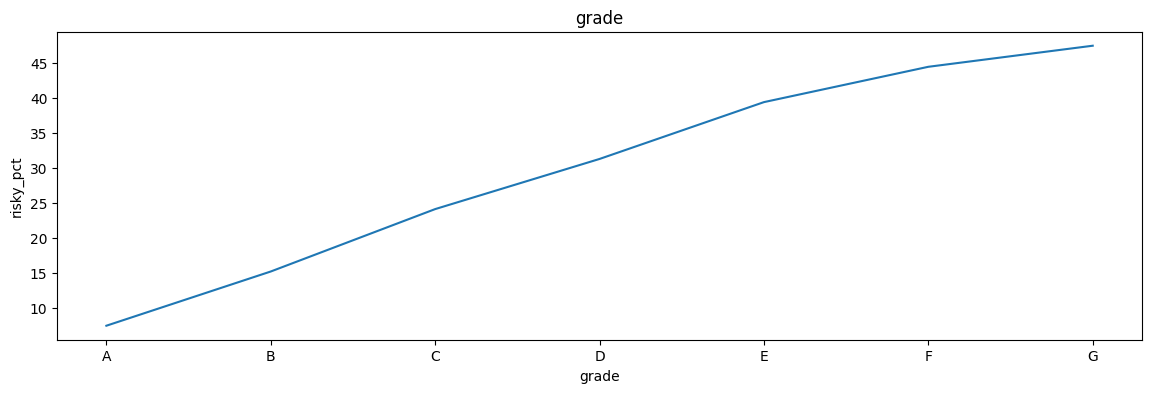

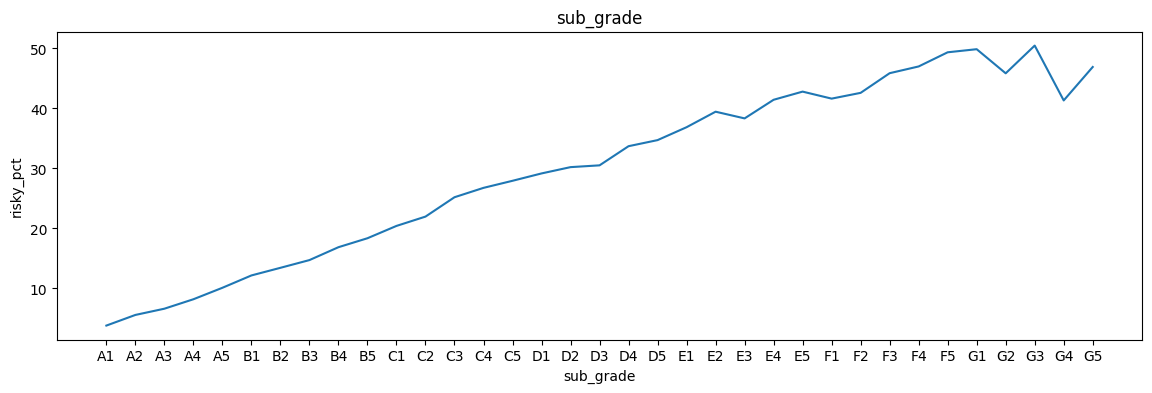

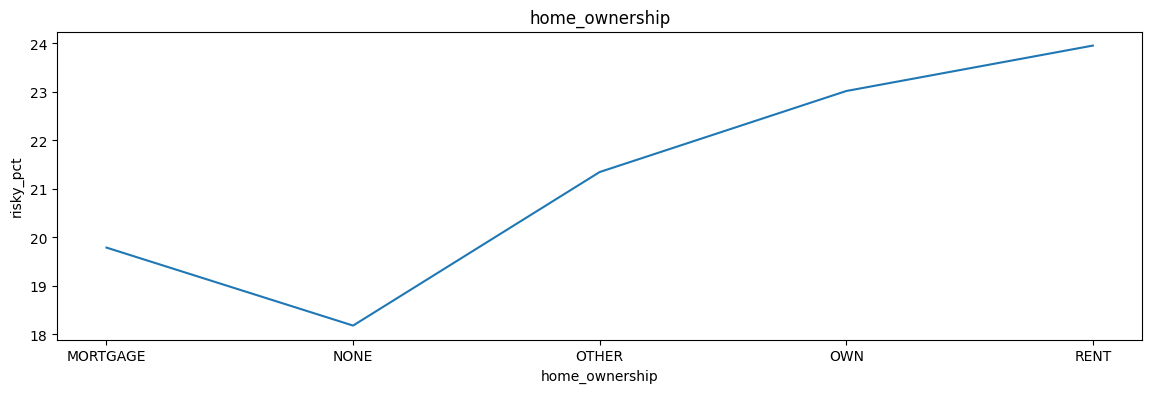

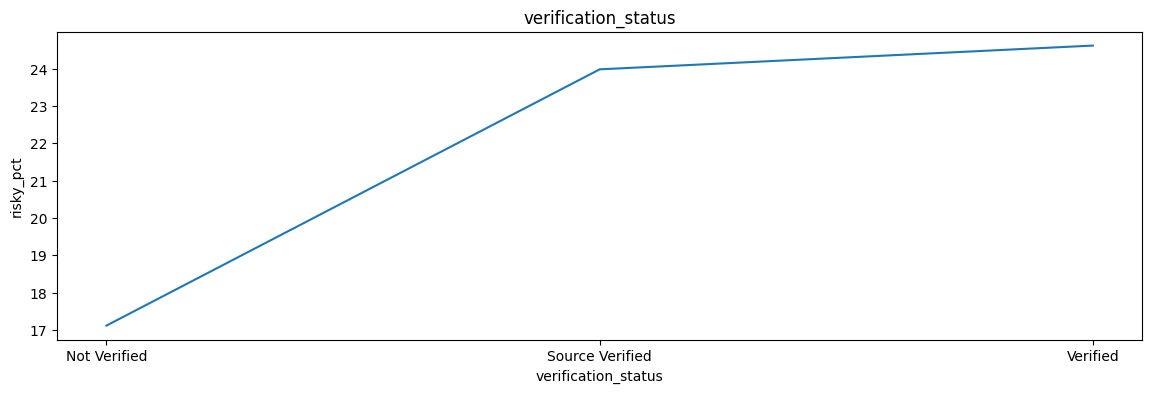

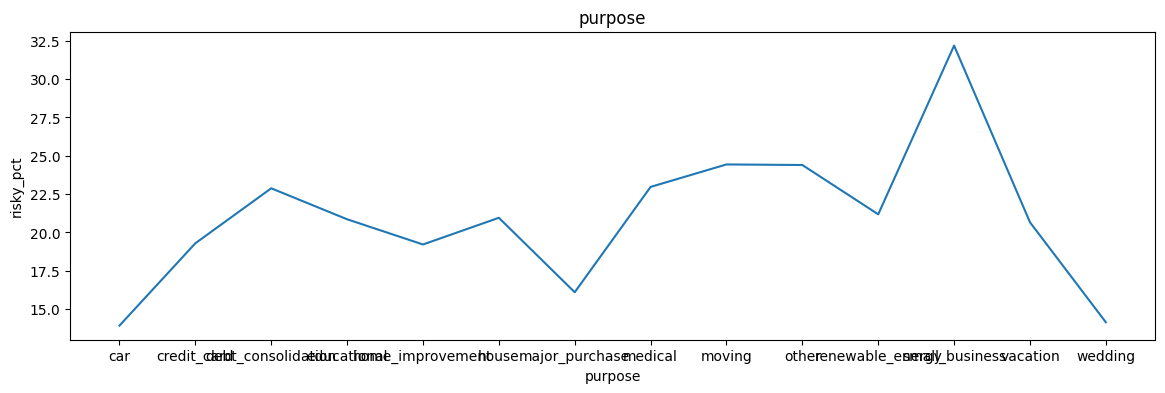

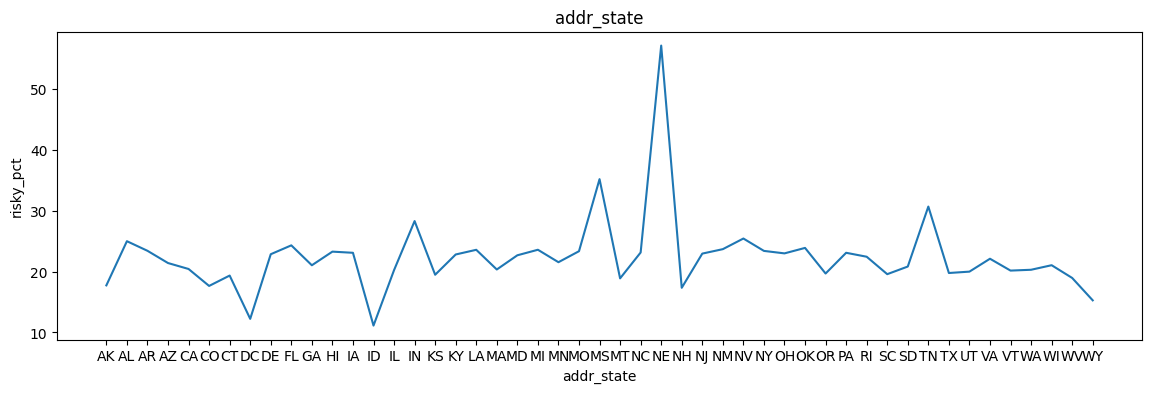

In [ ]:
to_chart = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state']

for cols in to_chart:
    plt.figure(figsize=(14,4))
    risk_pct_chart(cols)

Kesimpulan:


*   Nilai dan subnilai sesuai dengan harapan, semakin rendah nilai, semakin berisiko pinjaman tersebut.
*   Ini cukup menarik dan kontra-intuitif untuk kepemilikan rumah & status verifikasi. "Tidak ada" dan "Tidak diverifikasi" memiliki persentase pinjaman risiko terendah.
*   Untuk tujuan, 'mobil', 'pembelian_besar', dan 'pernikahan' memiliki risiko terendah, sedangkan 'usaha_kecil' memiliki risiko tertinggi.
*   Juga menarik untuk melihat variasi persentase risiko di setiap negara bagian.

Bagaimanapun, kita akan mengubah semua data kategoris menjadi data numerik, dan karena nilai dan subnilai sama, saya akan menghapus subnilai untuk mengurangi jumlah total kolom.

In [ ]:
dropped_data = pd.concat([dropped_data, data['sub_grade']], axis = 1)
cat_data.drop('sub_grade', axis = 1, inplace=True)
cat_data.nunique()

term                    2
grade                   7
home_ownership          6
verification_status     3
purpose                14
addr_state             50
initial_list_status     2
loan_ending             2
dtype: int64


1.   Untuk 'term', kita akan menghapus "bulan" dan secara otomatis akan menjadi variabel numerik
2.   Untuk 'grade', kita akan menggunakan encoder ordinal... atau hanya menggunakan peta lol.
3. *   home_ownership
   *   verification status
   *   purpose
   *   addr_state
   *   intial_list_status -> tapi hanya 1 sudah cukup jadi kita akan menjatuhkan 1 kolom palsu





In [ ]:
cat_data['term'] = cat_data['term'].str.replace(' months', '').astype(int)

In [ ]:
cat_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}

cat_data['grade'] = cat_data['grade'].map(grade_map)

In [ ]:
to_dummies = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']

dummies = pd.get_dummies(cat_data[to_dummies])
dummies.drop('initial_list_status_w', axis=1, inplace=True)

In [ ]:
dummies.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dropped_data = pd.concat([dropped_data, cat_data[to_dummies]], axis = 1)
cat_data.drop(to_dummies, axis=1, inplace=True)

In [ ]:
cat_data_f = pd.concat([cat_data, dummies], axis = 1)

In [ ]:
final_data = pd.concat([num_data, cat_data_f], axis = 1).dropna().reset_index().drop('index', axis = 1)
final_data.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,5000,10.65,162.87,10,24000.0,27.65,0.0,1.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,2500,15.27,59.83,0,30000.0,1.00,0.0,5.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,2400,15.96,84.33,10,12252.0,8.72,0.0,2.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,10000,13.49,339.31,10,49200.0,20.00,0.0,1.0,10.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,5000,7.90,156.46,3,36000.0,11.20,0.0,3.0,9.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X = final_data.drop('loan_ending', axis = 1)
y = final_data['loan_ending']

In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [ ]:
kaggle_train_y = np.where(train_y == 'good', 1, 0)
kaggle_val_y = np.where(val_y == 'good', 1, 0)

**MODELLING DATA**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
pred_y = np.where(val_y == 'good',1,1)
print(classification_report(kaggle_val_y, pred_y))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12822
           1       0.78      1.00      0.88     46686

    accuracy                           0.78     59508
   macro avg       0.39      0.50      0.44     59508
weighted avg       0.62      0.78      0.69     59508



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Berikut cara membaca laporan klasifikasi ini:

Precision = jika precision > 0.5, berarti variabel yang diprediksi benar lebih tinggi daripada variabel yang salah diprediksi. Misalnya, presisi 'baik' sebesar 0.78 berarti dari semua pinjaman yang diprediksi sebagai 'baik', 78% benar, dan 22% sebenarnya adalah pinjaman yang berisiko.
Recall = jika recall > 0.5, berarti berdasarkan nilai sebenarnya, kita memprediksi lebih dari 50% dengan benar. Misalnya, recall 'baik' sebesar 1 berarti kita memprediksi semua pinjaman 'baik' dengan benar.
Untuk menyederhanakan:

Presisi 'baik' yang lebih tinggi berarti kita berinvestasi dalam pinjaman berisiko lebih sedikit (investasi pinjaman baik > investasi pinjaman berisiko).
Presisi 'berisiko' yang lebih tinggi berarti kita menghindari pinjaman berisiko lebih banyak (menghindari pinjaman berisiko > menghindari pinjaman baik).
Recall 'baik' x% berarti kita berinvestasi dalam x% pinjaman baik yang tersedia (investasi pinjaman baik > menghindari pinjaman baik).
Recall 'berisiko' x% berarti kita menghindari x% dari pinjaman berisiko yang tersedia (menghindari pinjaman berisiko > investasi pinjaman berisiko).
Akurasi tidak memberi kita informasi apa pun. Ketika kita menjalankan otak kera dan menerima semua pinjaman yang tersedia, akurasinya 78% lol.

Evaluator yang harus diprioritaskan tergantung pada preferensi Anda. Dalam kasus saya:

Presisi 'baik' secara harfiah berarti keseimbangan portofolio kita, jadi saya ingin setidaknya lebih tinggi daripada jika kita menggunakan otak kera (78%).
Saya adalah orang yang hati-hati, tetapi saya juga tidak ingin melewatkan kesepakatan bagus karena itu, jadi setidaknya presisi 'berisiko' lebih tinggi dari 50% -> setiap 2 pinjaman yang saya hindari, setidaknya 1 di antaranya benar-benar berisiko.
Saya tidak ingin melewatkan kesepakatan bagus, jadi saya ingin recall 'baik' dimaksimalkan. -> berinvestasi sebanyak mungkin dalam pinjaman baik yang tersedia.
Untuk recall 'berisiko', saya tidak terlalu peduli, selama presisi 'berisiko' lebih tinggi dari 50%.

In [ ]:
dt = tree.DecisionTreeClassifier(random_state = 14)
dt.fit(train_X, kaggle_train_y)
pred_y = dt.predict(val_X)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34     12822
           1       0.82      0.80      0.81     46686

    accuracy                           0.70     59508
   macro avg       0.57      0.57      0.57     59508
weighted avg       0.71      0.70      0.71     59508



In [ ]:
# KNN
knn = KNeighborsClassifier()
knn.fit(train_X, kaggle_train_y)
pred_y = knn.predict(val_X)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.28      0.11      0.16     12822
           1       0.79      0.92      0.85     46686

    accuracy                           0.75     59508
   macro avg       0.53      0.52      0.51     59508
weighted avg       0.68      0.75      0.70     59508



In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state = 14)
rf.fit(train_X, kaggle_train_y)
pred_y = rf.predict(val_X)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.61      0.12      0.21     12822
           1       0.80      0.98      0.88     46686

    accuracy                           0.79     59508
   macro avg       0.70      0.55      0.54     59508
weighted avg       0.76      0.79      0.74     59508



In [ ]:
# XGB
xgb = XGBClassifier(random_state = 14)
xgb.fit(train_X, kaggle_train_y)
pred_y = xgb.predict(val_X)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.58      0.20      0.29     12822
           1       0.81      0.96      0.88     46686

    accuracy                           0.80     59508
   macro avg       0.70      0.58      0.59     59508
weighted avg       0.76      0.80      0.75     59508



Kandidat yang menjanjikan berdasarkan kriteria

1. Random Forest
2. XGB
3. Soft voting classifier

Harus memiliki: presisi 'bagus' > 0.78, presisi 'berisiko' > 0.5, dan untuk memilih model terakhir -> maksimalkan recall 'bagus'.








Model tuned performance

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
'''knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
tuned_knn = clf_knn.fit(train_X, train_y)
pred_y = tuned_knn.predict(val_X)
print(classification_report(val_y, pred_y))'''

"knn = KNeighborsClassifier()\nparam_grid = {'n_neighbors' : [3,5,7,9],\n              'weights' : ['uniform', 'distance'],\n              'algorithm' : ['auto', 'ball_tree','kd_tree'],\n              'p' : [1,2]}\nclf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\ntuned_knn = clf_knn.fit(train_X, train_y)\npred_y = tuned_knn.predict(val_X)\nprint(classification_report(val_y, pred_y))"

In [ ]:
'''rf = RandomForestClassifier(random_state = 14)
param_grid =  {'n_estimators': [100,500,1000],
              'bootstrap': [True,False],
              'max_depth': [3,5,10,20,50,75,100,None],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [1,2,4,10],
              'min_samples_split': [2,5,10]}

clf_rf = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
tuned_rf = clf_rf.fit(train_X, train_y)
pred_y = tuned_rf.predict(val_X)
print(classification_report(val_y, pred_y))'''

"rf = RandomForestClassifier(random_state = 14)\nparam_grid =  {'n_estimators': [100,500,1000], \n              'bootstrap': [True,False],\n              'max_depth': [3,5,10,20,50,75,100,None],\n              'max_features': ['auto','sqrt'],\n              'min_samples_leaf': [1,2,4,10],\n              'min_samples_split': [2,5,10]}\n                                  \nclf_rf = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)\ntuned_rf = clf_rf.fit(train_X, train_y)\npred_y = tuned_rf.predict(val_X)\nprint(classification_report(val_y, pred_y))"

In [ ]:
'''xgb = XGBClassifier(random_state = 1)
param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
tuned_xgb = clf_xgb.fit(train_X, train_y)
pred_y = tuned_xgb.predict(val_X)
print(classification_report(val_y, pred_y))'''

"xgb = XGBClassifier(random_state = 1)\nparam_grid = {\n    'n_estimators': [20, 50, 100, 250, 500,1000],\n    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],\n    'max_depth': [2, 5, 10, 15, 20, 25, None],\n    'reg_alpha': [0, 0.5, 1],\n    'reg_lambda': [1, 1.5, 2],\n    'subsample': [0.5,0.6,0.7, 0.8, 0.9],\n    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],\n    'gamma':[0,.01,.1,1,10,100],\n    'min_child_weight':[0,.01,0.1,1,10,100],\n    'sampling_method': ['uniform', 'gradient_based']\n}\n\nclf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)\ntuned_xgb = clf_xgb.fit(train_X, train_y)\npred_y = tuned_xgb.predict(val_X)\nprint(classification_report(val_y, pred_y))"

Baiklah, mari cetak parameter terbaik sehingga kita tidak perlu mencoba lagi proses tuning yang melelahkan ini. Apakah itu sepadan? Dalam kasus kita, tidak benar-benar. Tetapi saya pikir itu karena saya masih belum memahami bagaimana tuning bekerja, dan mengatur parameter dengan tidak benar, misalnya: parameter untuk memilih tuning terbaik (akurasi, presisi, recall, dll).

In [ ]:
'''print(str(tuned_knn.best_params_))'''

'print(str(tuned_knn.best_params_))'

In [ ]:
'''print(str(tuned_rf.best_params_))'''

'print(str(tuned_rf.best_params_))'

In [ ]:
'''print(str(tuned_xgb.best_params_))'''

'print(str(tuned_xgb.best_params_))'

Kesimpulan dan saran

Di situlah kita memiliki model terbaik yang dapat kita miliki untuk masalah kredit pinjaman ini:

**Random Forest:** Jika kita memilih random forest sebagai algoritma, portofolio kita akan terdiri dari 80% pinjaman baik : 20% pinjaman berisiko, dan kita akan berinvestasi dalam 98% dari pinjaman baik yang tersedia. Ini juga dapat menghindari 63 pinjaman berisiko untuk setiap 100 pinjaman yang dihindari (menghindari 63 berisiko : 37 baik).
**XGB:** Jika kita memilih XGB sebagai algoritma, portofolio kita akan terdiri dari 81% pinjaman baik : 19% pinjaman berisiko, dan kita akan berinvestasi dalam 96% dari pinjaman baik yang tersedia. Ini juga dapat menghindari 59 pinjaman berisiko untuk setiap 100 pinjaman yang dihindari (menghindari 59 berisiko : 41 baik).

In [ ]:
dropped_data.columns

Index(['funded_amnt', 'funded_amnt_inv', 'id', 'member_id', 'url', 'desc',
       'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'earliest_cr_line', 'last_credit_pull_d',
       'zip_code', 'title', 'emp_title', 'sub_grade', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

1. Lakukan oversampling. Alasannya adalah karena kita memiliki data yang cukup tidak seimbang, hanya 22% dari data merupakan pinjaman yang berisiko.
2. Cobalah untuk memodifikasi pengelompokan status pinjaman. Mungkin Anda tidak terlalu mempermasalahkan keterlambatan 16-30 hari, atau Anda hanya ingin menggunakan "charged off" dan "default" secara ketat sebagai akhir yang buruk. Itu terserah Anda, dan akan menarik untuk melihat bagaimana hasilnya akan berbeda.
3. Tambahkan kolom "informasi lengkap disediakan". Dari kolom-kolom yang dihapus di atas, cukup menarik untuk melihat variabel seperti 'desc', 'zip_code', 'title', 'emp_title'. Mereka memiliki nilai unik yang terlalu banyak sehingga saya tidak menggunakannya, tetapi, saya pikir cukup menarik untuk melihat apa efek dari menyediakan informasi tersebut pada risiko pinjaman. Misalnya: buat kolom 'provide_desc', dengan nilai 1 (pinjaman memberikan deskripsi) dan 0 (pinjaman tidak memberikan deskripsi). Kita bisa melakukannya untuk kolom-kolom ini: 'desc', 'zip_code', 'title', 'emp_title'. Kita bisa dengan mudah menggunakan np.where untuk ini. Asumsi saya berdasarkan ini -> semakin lengkap informasi yang diberikan = semakin niat untuk membayar pinjaman. Terutama untuk pinjaman "usaha kecil" (lebih banyak pinjaman berisiko dibandingkan dengan kelompok lain), jika mereka memberikan deskripsi, setidaknya kita tahu bahwa mereka memiliki rencana bisnis.